In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('heart.csv')

# Display first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
# Check for missing values in the dataset
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


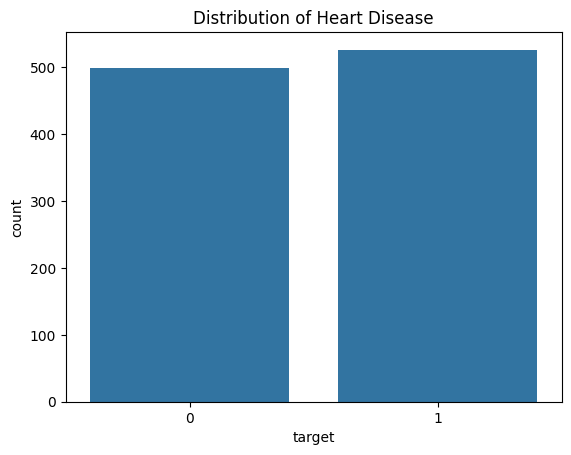

In [25]:
# Check basic info of the dataset (missing values, data types)
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Visualize the distribution of the target variable (presence of heart disease)
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

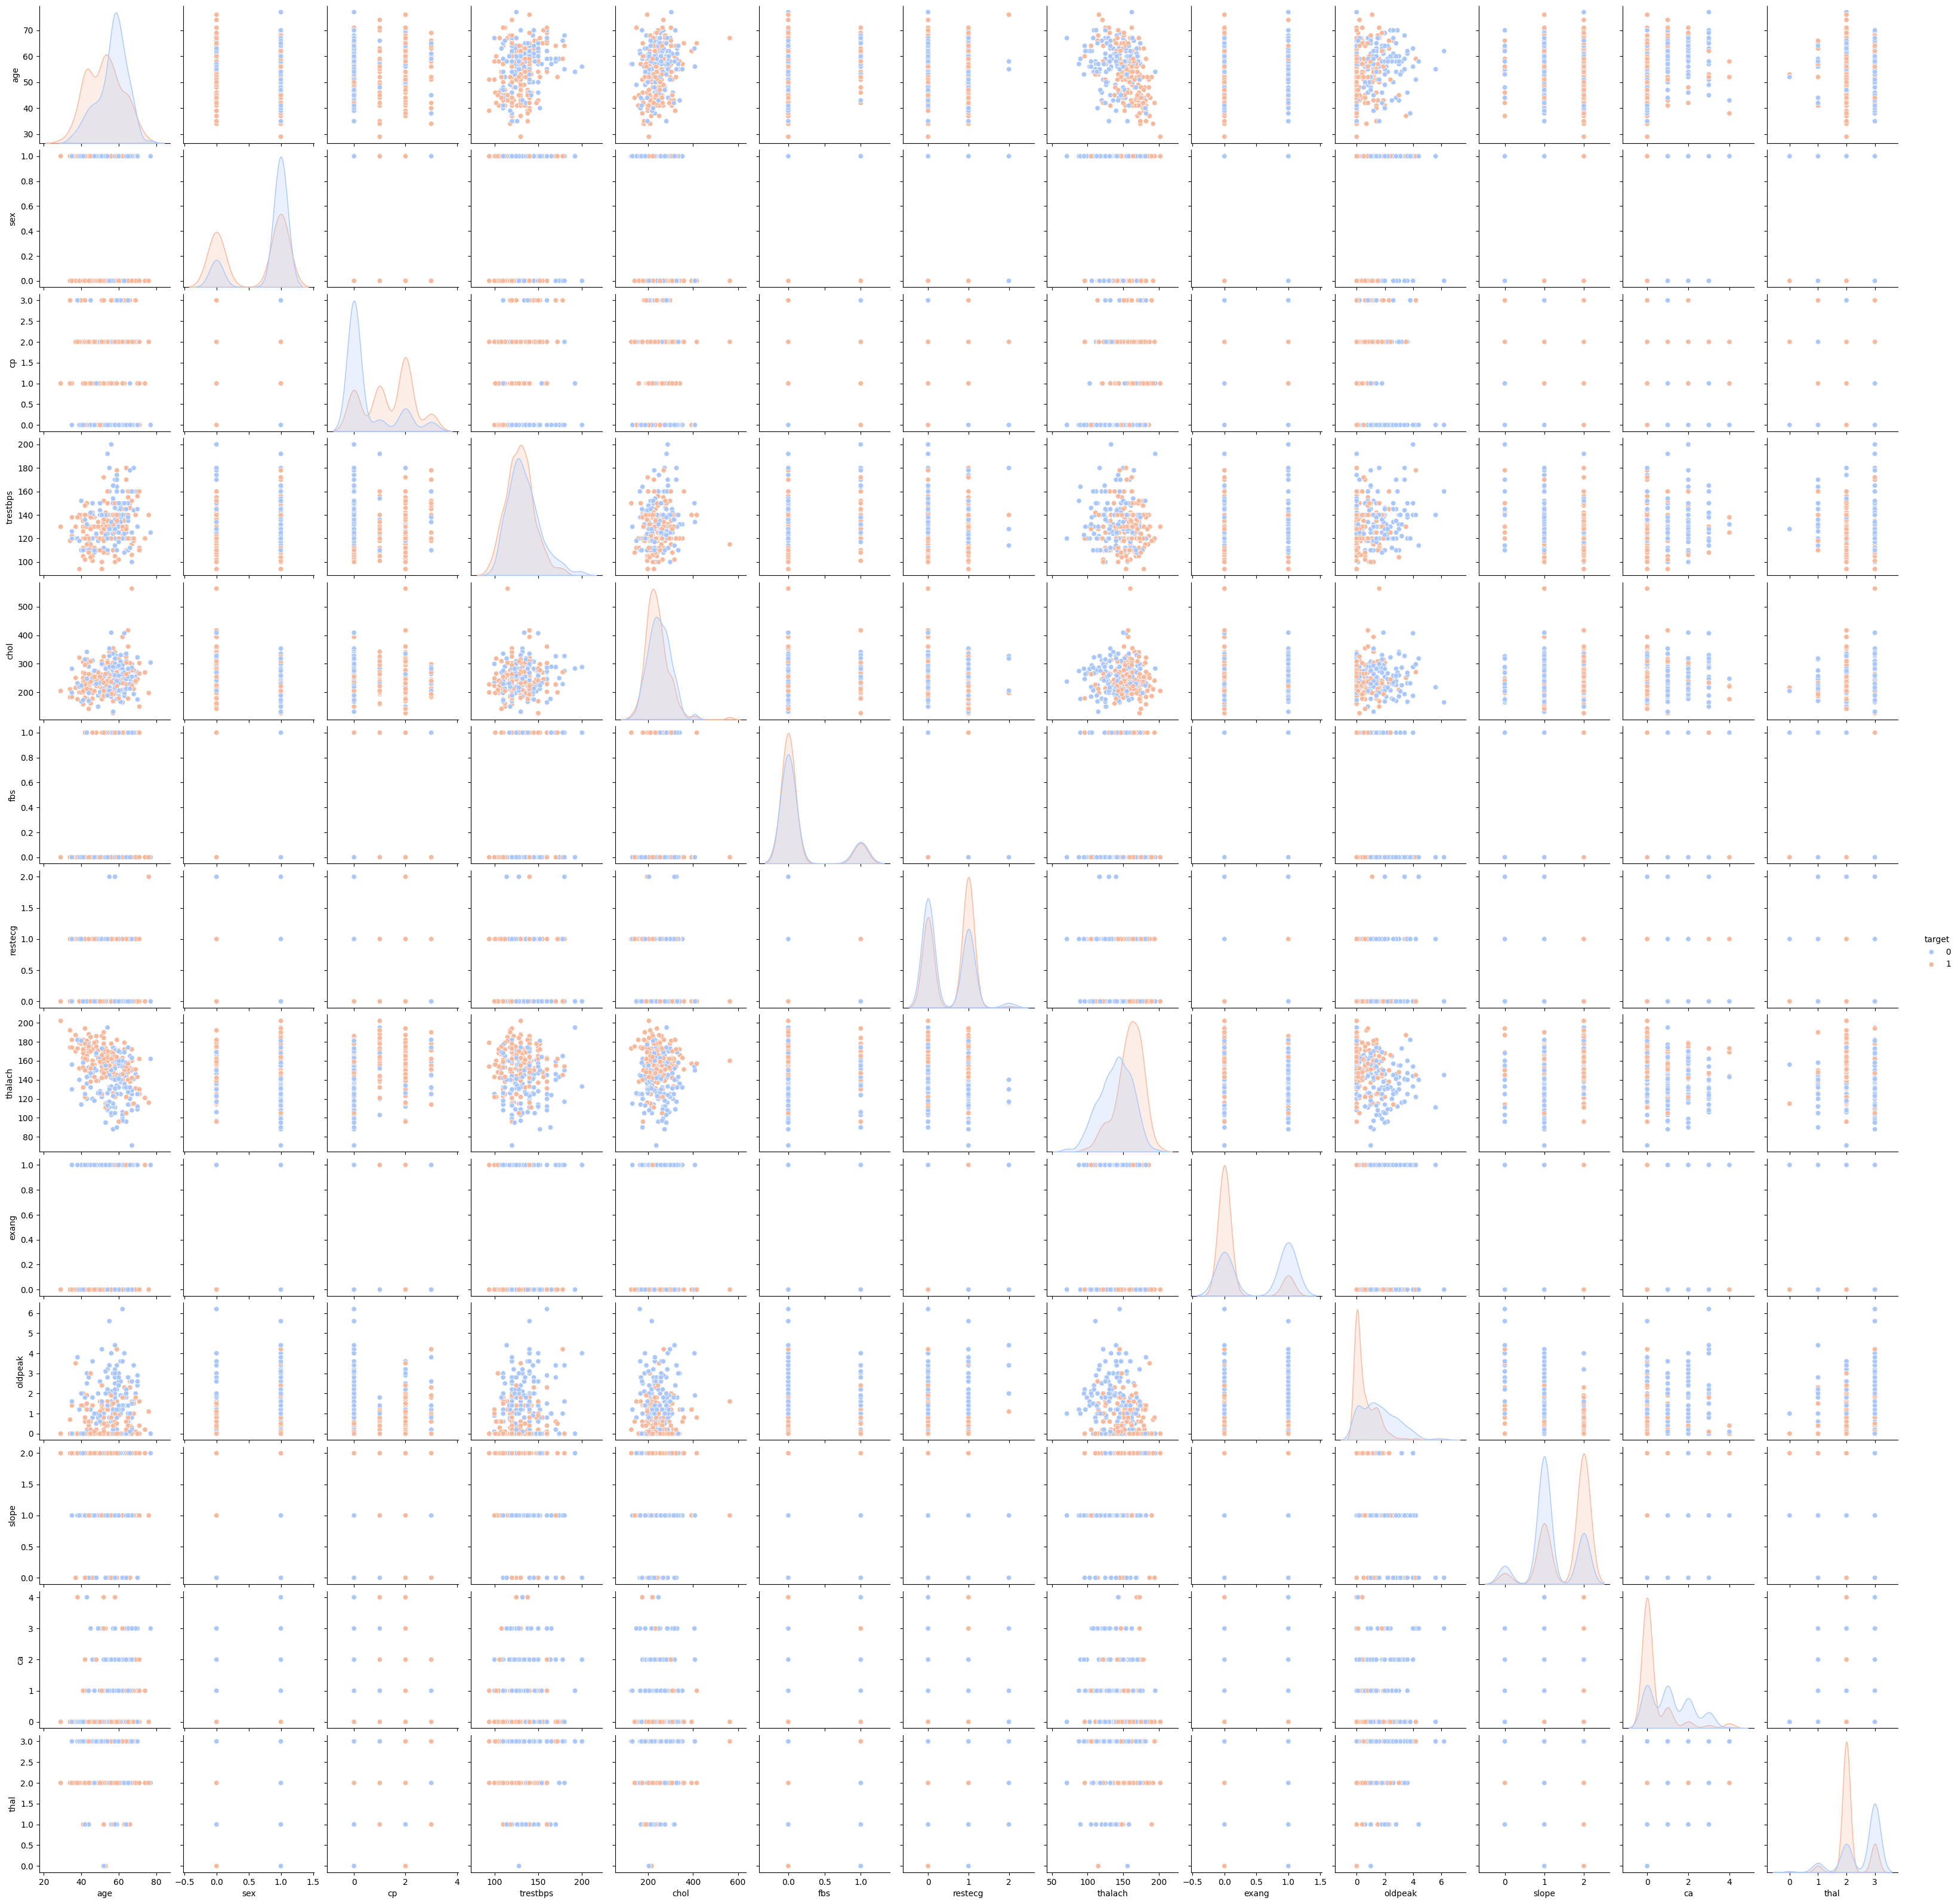

In [26]:
# Visualize pairwise relationships using pairplot
sns.pairplot(df, hue='target', palette="coolwarm")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
# 'sex' column: Male = 1, Female = 0
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])

# For other categorical variables like 'cp', 'slope', 'thal', etc., use LabelEncoder as well
df['cp'] = encoder.fit_transform(df['cp'])
df['restecg'] = encoder.fit_transform(df['restecg'])
df['slope'] = encoder.fit_transform(df['slope'])
df['thal'] = encoder.fit_transform(df['thal'])

# Define features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target'].map({'No Disease': 0, 'Disease': 1})

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA and logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.80


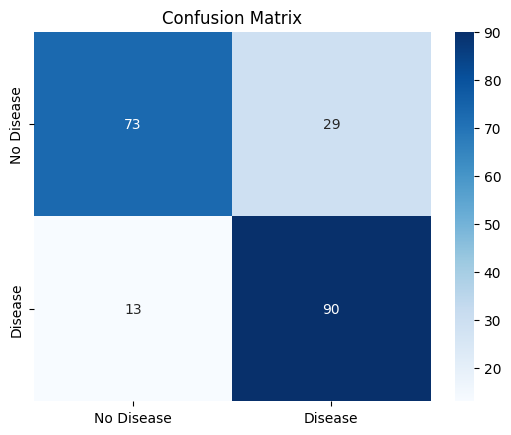

In [31]:
# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model performance
accuracy = log_reg.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.show()

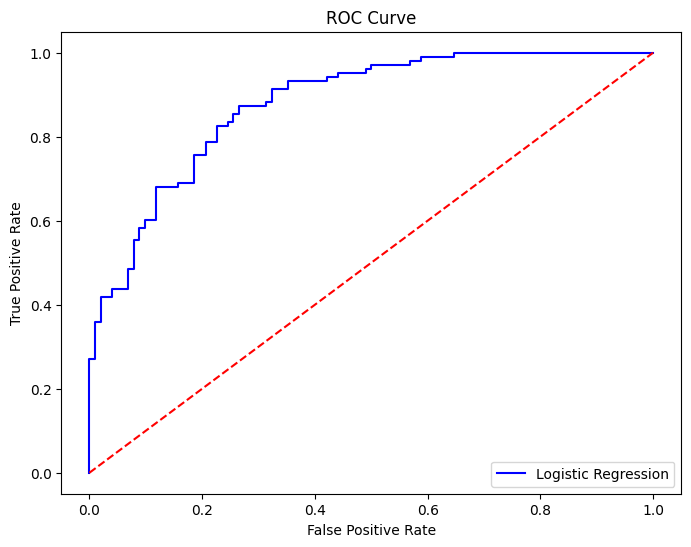

Area Under the Curve (AUC): 0.79


In [32]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Compute AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Area Under the Curve (AUC): {roc_auc:.2f}")

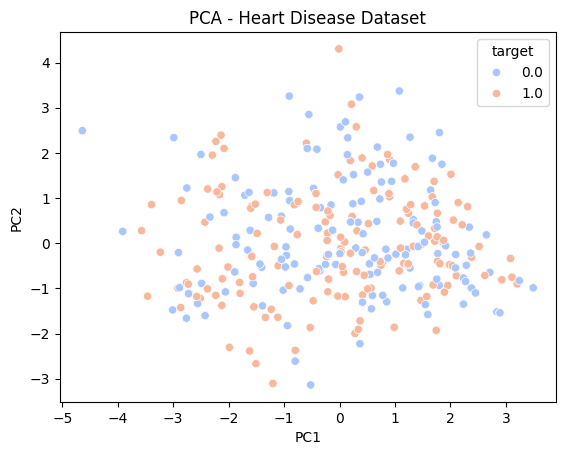

In [33]:
# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y_train

# Plot the PCA result
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='coolwarm')
plt.title('PCA - Heart Disease Dataset')
plt.show()